### 인공 신경망의 cost 함수
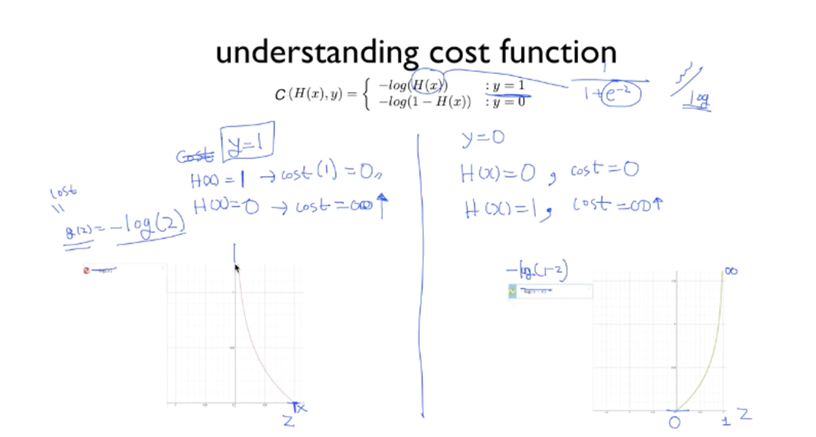

In [3]:
# H(x): 예측한 값, y: 실제 값
# y = 1일 때(왼쪽 그래프 ), H(x) = 1이면 cost = 0
#                         H(x) = 0이면 cost = inf
# y = 0일 때(오른쪽그래프), H(x) = 0이면 cost = 0
#                         H(x) = 1이면 cost = inf

### if문 사용하지 않고 하나의 수식으로 연결
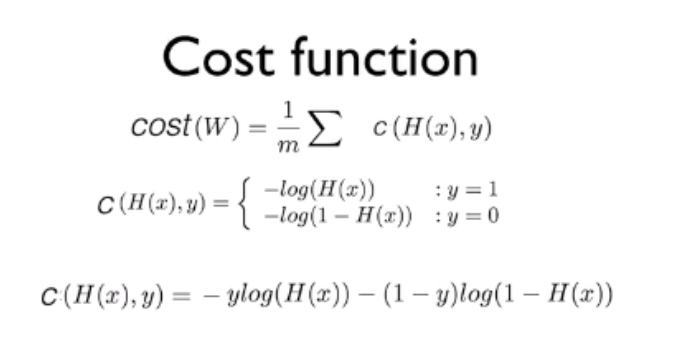

### Sigmoid
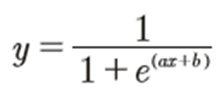
- 1 / 1 + e**(Wx + b)

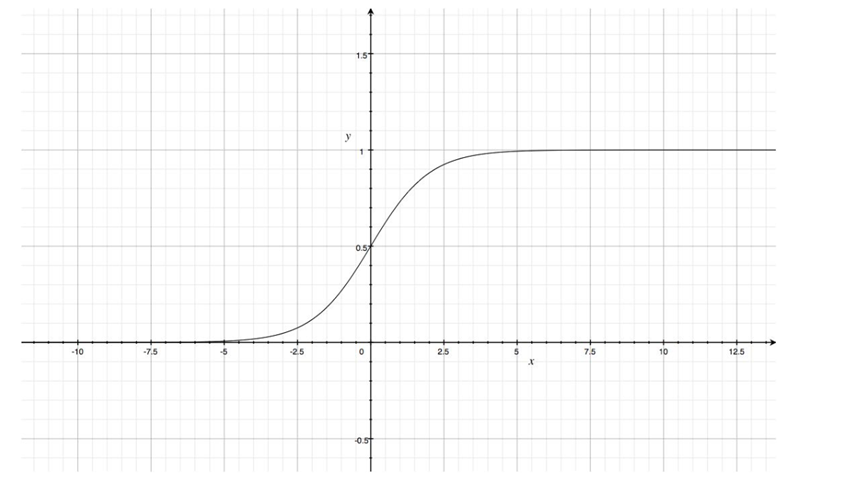

경사 하강법은 정확하게 가중치를 찾아가지만, 한 번 업데이트할 때마다 전체 데이터를 미분해야 하므로 계산량이 매우 많다는 단점이 있음
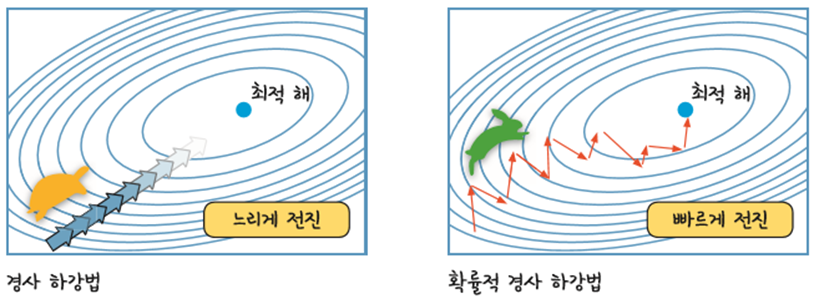

- cf. 모든 Training Set을 기반으로 수행하는 것: Batch Gradient Descent

- stochastic(확률적): Randomly determined; having a random probability distribution or pattern that may be analyzed statistically but may not be predicted precisely.

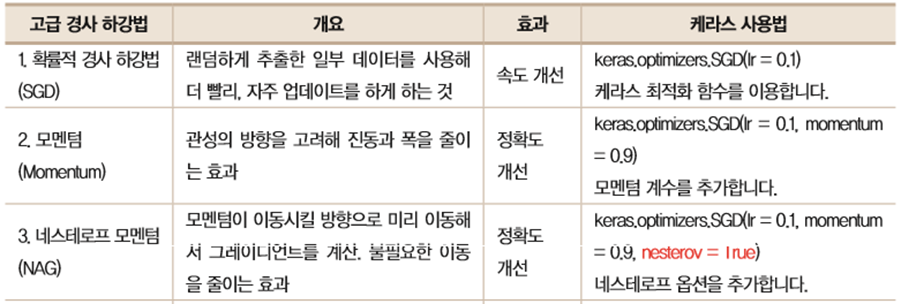

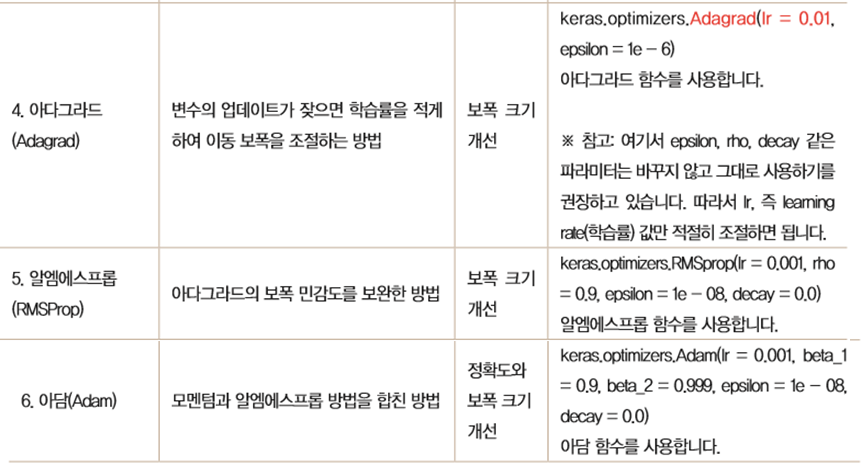

- AdaGrad(Adaptive Gradient): 학습을 진행하면서 학습률을 점차 줄여가는 방법. 문제는 h의 값이 계속 커지기만 하므로, 언젠가는 학습률이 0에 수렴해 학습이 진행되지 않는 상황이 발생할 수 있음. 가중치 매개변수를 수정할 때, 학습률에 1/sqrt(h)를 곱해준 값을 실제 학습률로 사용
- RMSProp: 먼 과거의 기울기를 서서히 잊고 최근의 새로운 기울기 정보를 학습률 갱신에 크게 반영. 지수이동평균(EMA) 을 사용.

- Adam을 가장 많이 쓴다 (Momentum + RMS Prop)

 - Momentum: 경사 하강법과 마찬가지로 매번 기울기를 구하지만, 이를 통해 오차를 수정하기 전 바로 앞 수정 값과 방향(+, -)을 참고하여 같은 방향으로 일정한 비율만 수정되게 하는 방법 (이동에 탄력을 더한다)
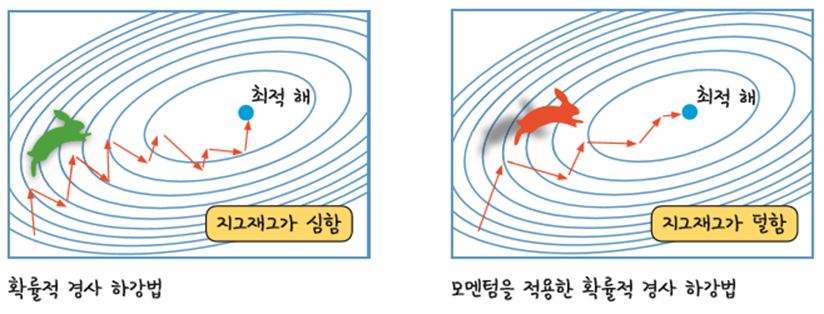

- 자세한 설명은 다음 링크
https://github.com/MagmaTart/DeepLearningStudy/blob/master/Soomin/summarys/20_Optimizer1.md
https://github.com/MagmaTart/DeepLearningStudy/blob/master/Soomin/summarys/21_Optimizer2.md

## 인공 신경망 AND 연산

In [5]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import numpy as np

tf.enable_eager_execution()
print(tf.__version__)

1.13.1


In [12]:
x_data = [
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
]

y_data =[
    [0.],
    [0.],
    [0.],
    [1.]
]

In [13]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

In [22]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

optimizer = tf.train.AdamOptimizer(0.01) # learning rate = 0.01

In [15]:
for step in range(5000):
    for X, Y in tfe.Iterator(dataset):
        with tf.GradientTape() as tape:
            hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
            cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1 - hypothesis))
            grads = tape.gradient(cost, [W, b])

    optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
    
    if step % 100 == 0:
        print('Iter: {}, Loss: {:.4f}'.format(step, cost))

Iter: 0, Loss: 1.0870
Iter: 100, Loss: 0.7189
Iter: 200, Loss: 0.5249
Iter: 300, Loss: 0.3961
Iter: 400, Loss: 0.3116
Iter: 500, Loss: 0.2531
Iter: 600, Loss: 0.2103
Iter: 700, Loss: 0.1776
Iter: 800, Loss: 0.1519
Iter: 900, Loss: 0.1312
Iter: 1000, Loss: 0.1143
Iter: 1100, Loss: 0.1003
Iter: 1200, Loss: 0.0886
Iter: 1300, Loss: 0.0787
Iter: 1400, Loss: 0.0703
Iter: 1500, Loss: 0.0631
Iter: 1600, Loss: 0.0568
Iter: 1700, Loss: 0.0514
Iter: 1800, Loss: 0.0466
Iter: 1900, Loss: 0.0425
Iter: 2000, Loss: 0.0388
Iter: 2100, Loss: 0.0355
Iter: 2200, Loss: 0.0326
Iter: 2300, Loss: 0.0300
Iter: 2400, Loss: 0.0276
Iter: 2500, Loss: 0.0255
Iter: 2600, Loss: 0.0236
Iter: 2700, Loss: 0.0219
Iter: 2800, Loss: 0.0203
Iter: 2900, Loss: 0.0189
Iter: 3000, Loss: 0.0176
Iter: 3100, Loss: 0.0164
Iter: 3200, Loss: 0.0153
Iter: 3300, Loss: 0.0143
Iter: 3400, Loss: 0.0134
Iter: 3500, Loss: 0.0126
Iter: 3600, Loss: 0.0118
Iter: 3700, Loss: 0.0110
Iter: 3800, Loss: 0.0104
Iter: 3900, Loss: 0.0097
Iter: 4000, 

In [16]:
predict = tf.cast(hypothesis > 0.5, dtype = tf.float32) # 조건 만족시 1, 아니면 0 리턴
print('='*40)
print('predict')
print(predict)
print('='*40)
print('Y')
print(Y)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, Y), dtype=tf.int32))
print('='*40)
print('accuracy')
print(accuracy)

predict
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [1.]], shape=(4, 1), dtype=float32)
Y
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [1.]], shape=(4, 1), dtype=float32)
accuracy
tf.Tensor(1, shape=(), dtype=int32)


## 인공 신경망 XOR 연산

In [18]:
x_data = [
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
]

y_data =[
    [0.],
    [1.],
    [1.],
    [0.]
]

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

In [23]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

optimizer = tf.train.AdamOptimizer(0.01) # learning rate = 0.01

In [21]:
for step in range(5000):
    for X, Y in tfe.Iterator(dataset):
        with tf.GradientTape() as tape:
            hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
            cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1 - hypothesis))
            grads = tape.gradient(cost, [W, b])

    optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
    
    if step % 100 == 0:
        print('Iter: {}, Loss: {:.4f}'.format(step, cost))

Iter: 0, Loss: 0.8305
Iter: 100, Loss: 0.7291
Iter: 200, Loss: 0.6998
Iter: 300, Loss: 0.6939
Iter: 400, Loss: 0.6932
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
Iter: 1100, Loss: 0.6931
Iter: 1200, Loss: 0.6931
Iter: 1300, Loss: 0.6931
Iter: 1400, Loss: 0.6931
Iter: 1500, Loss: 0.6931
Iter: 1600, Loss: 0.6931
Iter: 1700, Loss: 0.6931
Iter: 1800, Loss: 0.6931
Iter: 1900, Loss: 0.6931
Iter: 2000, Loss: 0.6931
Iter: 2100, Loss: 0.6931
Iter: 2200, Loss: 0.6931
Iter: 2300, Loss: 0.6931
Iter: 2400, Loss: 0.6931
Iter: 2500, Loss: 0.6931
Iter: 2600, Loss: 0.6931
Iter: 2700, Loss: 0.6931
Iter: 2800, Loss: 0.6931
Iter: 2900, Loss: 0.6931
Iter: 3000, Loss: 0.6931
Iter: 3100, Loss: 0.6931
Iter: 3200, Loss: 0.6931
Iter: 3300, Loss: 0.6931
Iter: 3400, Loss: 0.6931
Iter: 3500, Loss: 0.6931
Iter: 3600, Loss: 0.6931
Iter: 3700, Loss: 0.6931
Iter: 3800, Loss: 0.6931
Iter: 3900, Loss: 0.6931
Iter: 4000, 

In [25]:
predict = tf.cast(hypothesis > 0.5, dtype = tf.float32) # 조건 만족시 1, 아니면 0 리턴
print('='*40)
print('predict')
print(predict)
print('='*40)
print('Y')
print(Y)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, Y), dtype=tf.float32))
print('='*40)
print('accuracy')
print(accuracy)

predict
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]], shape=(4, 1), dtype=float32)
Y
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)
accuracy
tf.Tensor(0.5, shape=(), dtype=float32)


In [37]:
tf.sigmoid(8.)

<tf.Tensor: id=1201995, shape=(), dtype=float32, numpy=0.99966466>

- 선형 분리 불가 문제 해결
 1. 입력 차원을 늘린다. (x3, W3 추가)
 1. 입력을 비선형 변환 -> 선형 분리
 1. MLP

## 심층 신경망을 이용한 XOR
### MLP(Multi Layer Perceptron)

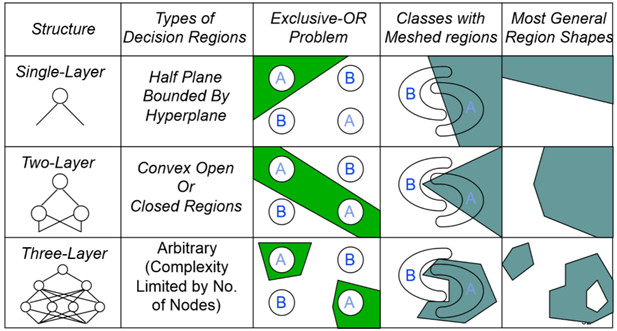

In [54]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import numpy as np

tf.enable_eager_execution()
print(tf.__version__)

1.13.1


In [69]:
x_data = [
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
]

y_data = [
    [0.],
    [1.],
    [1.],
    [0.]
]

In [70]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

W1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.random_normal([2]))

W2 = tf.Variable(tf.random_normal([2, 1]))
b2 = tf.Variable(tf.random_normal([1]))

optimizer = tf.train.AdamOptimizer(0.01)

In [71]:
for step in range(5000):
    for X, Y in tfe.Iterator(dataset):
        X = tf.cast(X, tf.float32)                    # 이 부분 질문? -> A) 단지 data type 변환!
        Y = tf.cast(Y, tf.float32)
        with tf.GradientTape() as tape:
            layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
            hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
            cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
            grads = tape.gradient(cost, [W1, W2, b1, b2])
            
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W1, W2, b1, b2]))
        
        if step % 100 == 0:
            print('Iter: {}, Loss: {:.4f}'.format(step, cost))

Iter: 0, Loss: 1.0081
Iter: 100, Loss: 0.6803
Iter: 200, Loss: 0.6552
Iter: 300, Loss: 0.6273
Iter: 400, Loss: 0.5896
Iter: 500, Loss: 0.5149
Iter: 600, Loss: 0.4458
Iter: 700, Loss: 0.4130
Iter: 800, Loss: 0.3955
Iter: 900, Loss: 0.3847
Iter: 1000, Loss: 0.3773
Iter: 1100, Loss: 0.3720
Iter: 1200, Loss: 0.3679
Iter: 1300, Loss: 0.3648
Iter: 1400, Loss: 0.3623
Iter: 1500, Loss: 0.3602
Iter: 1600, Loss: 0.3586
Iter: 1700, Loss: 0.3572
Iter: 1800, Loss: 0.3560
Iter: 1900, Loss: 0.3550
Iter: 2000, Loss: 0.3542
Iter: 2100, Loss: 0.3534
Iter: 2200, Loss: 0.3528
Iter: 2300, Loss: 0.3522
Iter: 2400, Loss: 0.3517
Iter: 2500, Loss: 0.3513
Iter: 2600, Loss: 0.3509
Iter: 2700, Loss: 0.3506
Iter: 2800, Loss: 0.3503
Iter: 2900, Loss: 0.3500
Iter: 3000, Loss: 0.3497
Iter: 3100, Loss: 0.3495
Iter: 3200, Loss: 0.3493
Iter: 3300, Loss: 0.3491
Iter: 3400, Loss: 0.3489
Iter: 3500, Loss: 0.3488
Iter: 3600, Loss: 0.3486
Iter: 3700, Loss: 0.3485
Iter: 3800, Loss: 0.3484
Iter: 3900, Loss: 0.3482
Iter: 4000, 

In [85]:
tf.cast(X, tf.int32)   # 이렇게 단지 dtype 변경 목적이었음.

<tf.Tensor: id=3553107, shape=(4, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])>

In [86]:
np.int32(X)

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [72]:
predict = tf.cast(hypothesis > 0.5, dtype = tf.float32)
print('='*40)
print('predict')
print(predict)
print('='*40)
print('Y')
print(Y)
print('='*40)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, Y), dtype = tf.float32))
print('accuracy')
print(accuracy)


predict
tf.Tensor(
[[0.]
 [1.]
 [0.]
 [1.]], shape=(4, 1), dtype=float32)
Y
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)
accuracy
tf.Tensor(0.5, shape=(), dtype=float32)


- Q)
        X = tf.cast(X, tf.float32)
        Y = tf.cast(Y, tf.float32)
        
 - 이 부분 없이 실행

In [73]:
x_data = [
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
]

y_data = [
    [0.],
    [1.],
    [1.],
    [0.]
]

In [74]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

W1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.random_normal([2]))

W2 = tf.Variable(tf.random_normal([2, 1]))
b2 = tf.Variable(tf.random_normal([1]))

optimizer = tf.train.AdamOptimizer(0.01)

In [75]:
for step in range(5000):
    for X, Y in tfe.Iterator(dataset):

        with tf.GradientTape() as tape:
            layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
            hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
            cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
            grads = tape.gradient(cost, [W1, W2, b1, b2])
            
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W1, W2, b1, b2]))
        
        if step % 100 == 0:
            print('Iter: {}, Loss: {:.4f}'.format(step, cost))

Iter: 0, Loss: 0.7202
Iter: 100, Loss: 0.6668
Iter: 200, Loss: 0.4635
Iter: 300, Loss: 0.2331
Iter: 400, Loss: 0.1316
Iter: 500, Loss: 0.0855
Iter: 600, Loss: 0.0608
Iter: 700, Loss: 0.0458
Iter: 800, Loss: 0.0360
Iter: 900, Loss: 0.0291
Iter: 1000, Loss: 0.0241
Iter: 1100, Loss: 0.0204
Iter: 1200, Loss: 0.0174
Iter: 1300, Loss: 0.0151
Iter: 1400, Loss: 0.0132
Iter: 1500, Loss: 0.0116
Iter: 1600, Loss: 0.0103
Iter: 1700, Loss: 0.0092
Iter: 1800, Loss: 0.0083
Iter: 1900, Loss: 0.0075
Iter: 2000, Loss: 0.0068
Iter: 2100, Loss: 0.0062
Iter: 2200, Loss: 0.0056
Iter: 2300, Loss: 0.0052
Iter: 2400, Loss: 0.0047
Iter: 2500, Loss: 0.0044
Iter: 2600, Loss: 0.0040
Iter: 2700, Loss: 0.0037
Iter: 2800, Loss: 0.0034
Iter: 2900, Loss: 0.0032
Iter: 3000, Loss: 0.0030
Iter: 3100, Loss: 0.0028
Iter: 3200, Loss: 0.0026
Iter: 3300, Loss: 0.0024
Iter: 3400, Loss: 0.0022
Iter: 3500, Loss: 0.0021
Iter: 3600, Loss: 0.0020
Iter: 3700, Loss: 0.0018
Iter: 3800, Loss: 0.0017
Iter: 3900, Loss: 0.0016
Iter: 4000, 

In [76]:
predict = tf.cast(hypothesis > 0.5, dtype = tf.float32)
print('='*40)
print('predict')
print(predict)
print('='*40)
print('Y')
print(Y)
print('='*40)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, Y), dtype = tf.float32))
print('accuracy')
print(accuracy)


predict
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)
Y
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)
accuracy
tf.Tensor(1.0, shape=(), dtype=float32)
